#### Objective: Segment customers in clusters in the Kaggle  Mall_Customers dataset


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

from scipy.stats import probplot




In [4]:
df=pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Null

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

CustomerId will be dispensed for the clustering

In [8]:
id_series = df['CustomerID']
id_series.shape

(200,)

In [9]:
df = df.drop(['CustomerID'], axis=1)

##### Gender

In [10]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0, 0.5, '% Customers')

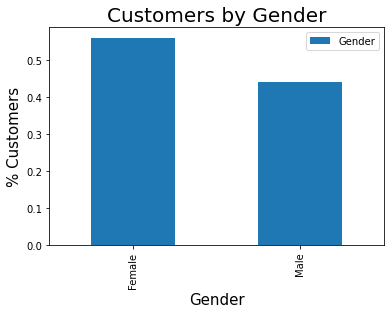

In [11]:
ax=df["Gender"].value_counts(normalize=True).plot(kind="bar")
plt.legend()
ax.set_title('Customers by Gender',fontsize=20)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('% Customers',fontsize=15)

Text(0, 0.5, 'N° Customers')

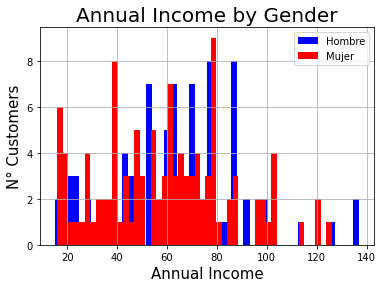

In [12]:
ax=df[df["Gender"]=="Male"]["Annual Income (k$)"].hist(bins=50,color="b",label='Hombre')
ax=df[df["Gender"]=="Female"]["Annual Income (k$)"].hist(bins=50,color="r",label='Mujer')

plt.legend()
ax.set_title('Annual Income by Gender',fontsize=20)
ax.set_xlabel('Annual Income',fontsize=15)
ax.set_ylabel('N° Customers',fontsize=15)

Text(0, 0.5, 'N° Customers')

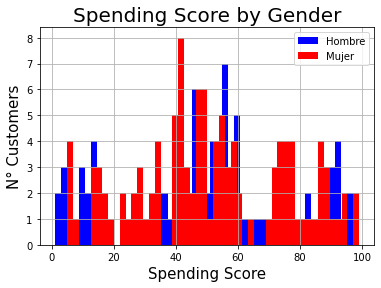

In [13]:
ax=df[df["Gender"]=="Male"]["Spending Score (1-100)"].hist(bins=50,color="b",label='Hombre')
ax=df[df["Gender"]=="Female"]["Spending Score (1-100)"].hist(bins=50,color="r",label='Mujer')

plt.legend()
ax.set_title('Spending Score by Gender',fontsize=20)
ax.set_xlabel('Spending Score',fontsize=15)
ax.set_ylabel('N° Customers',fontsize=15)

##### Age

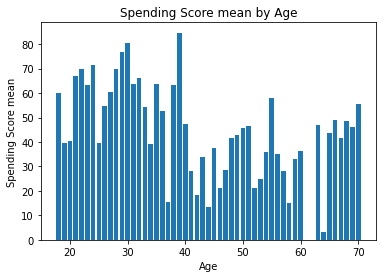

In [29]:
age = database.groupby('Age').describe()
plt.bar(x=age.index,height=age["Spending Score (1-100)"]['mean'])
plt.xlabel("Age")
plt.ylabel("Spending Score mean")
plt.title("Spending Score mean by Age")
plt.show()




Text(0.5, 1.0, 'Annual Income mean by Age')

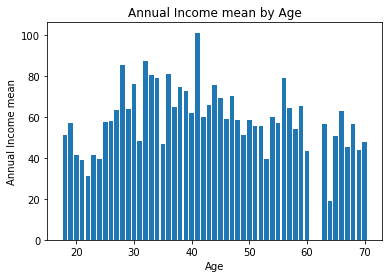

In [28]:
plt.bar(x=age.index,height=age["Annual Income (k$)"]['mean'])
plt.xlabel("Age")
plt.ylabel("Annual Income mean")
plt.title("Annual Income mean by Age")



#### Correlation

<AxesSubplot:>

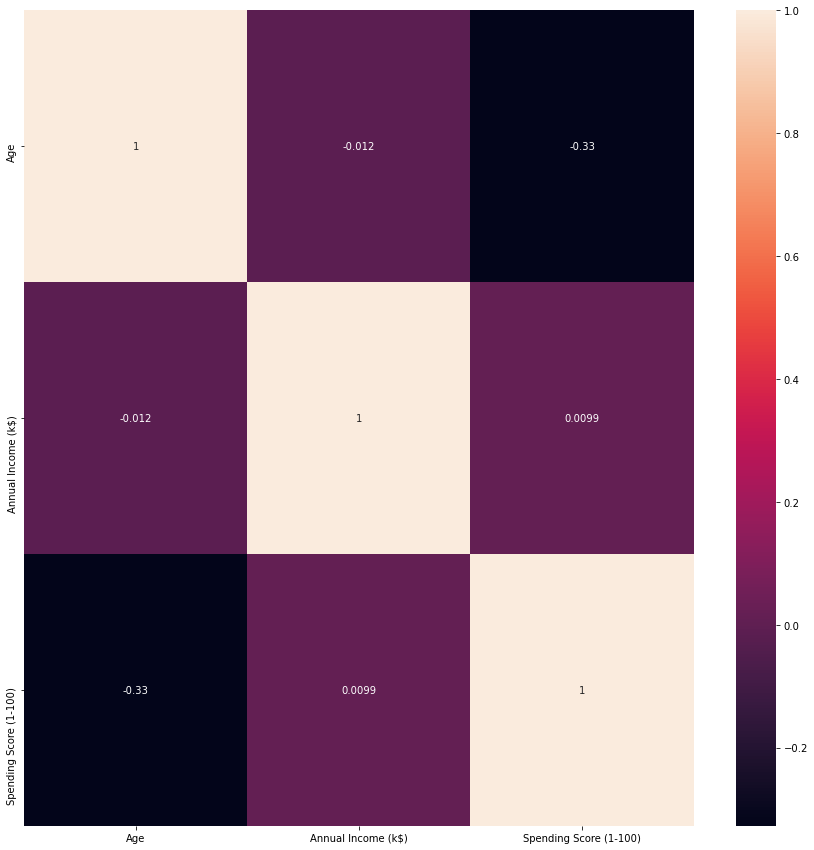

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
           annot=True)

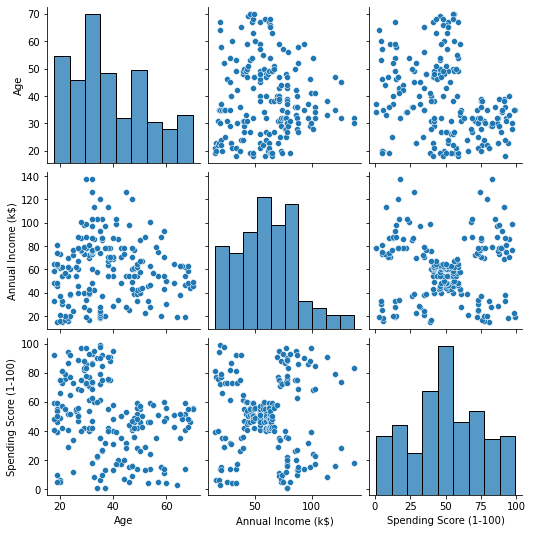

In [31]:
sns.pairplot(df)

Spending Score and Age will be the categories to take for the clustering 

In [33]:

df_cluster = df.drop(['Annual Income (k$)'], axis=1)
df_cluster = df_cluster.drop(['Gender'],axis=1)
df_cluster.shape

(200, 2)

#### Normalization:

In [35]:
df_norm=(df_cluster-df_cluster.min())/(df_cluster.max()-df_cluster.min())

In [36]:
df_norm.head()

,Age,Spending Score (1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


#### Elbow Method for optimization of clusters' number

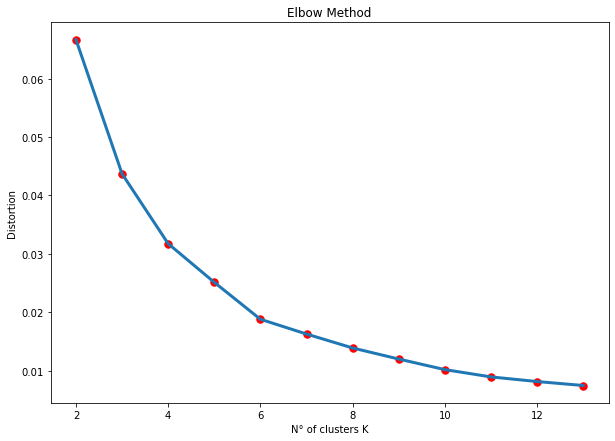

In [37]:
np.arange(2,14)

# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,df_norm.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('N° of clusters K')
plt.ylabel('Distortion')
plt.title('Elbow Method')

plt.show()

##### k=6 is the optimal 

-

#### Silhoutte Media

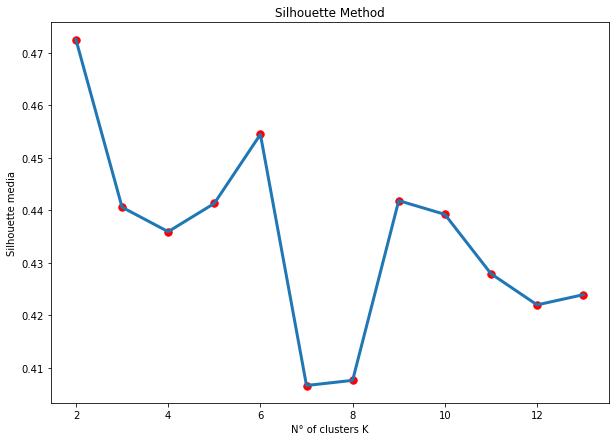

In [38]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(df_norm, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('N° of clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette Method')

plt.show()

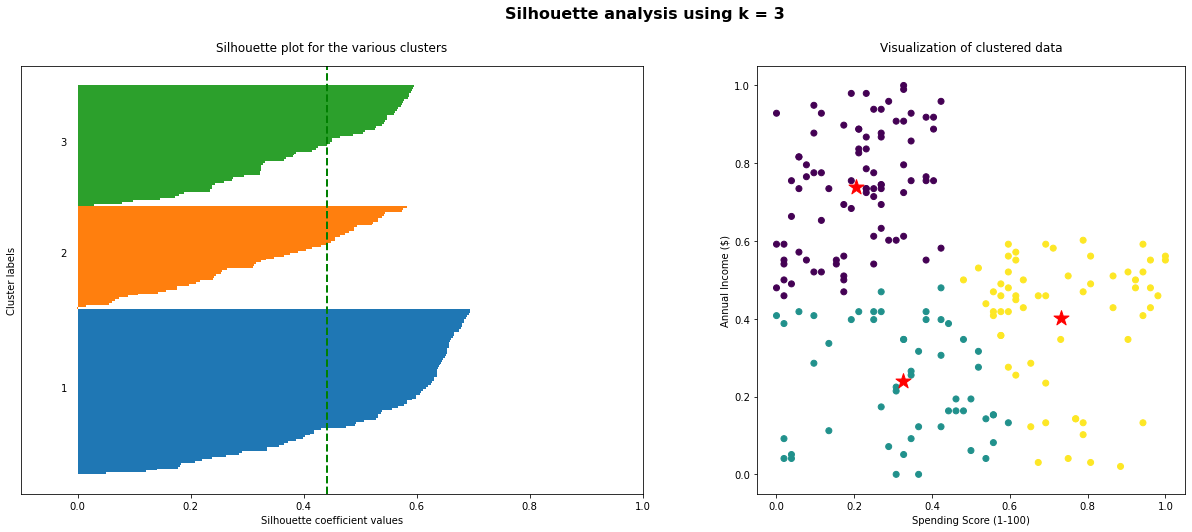

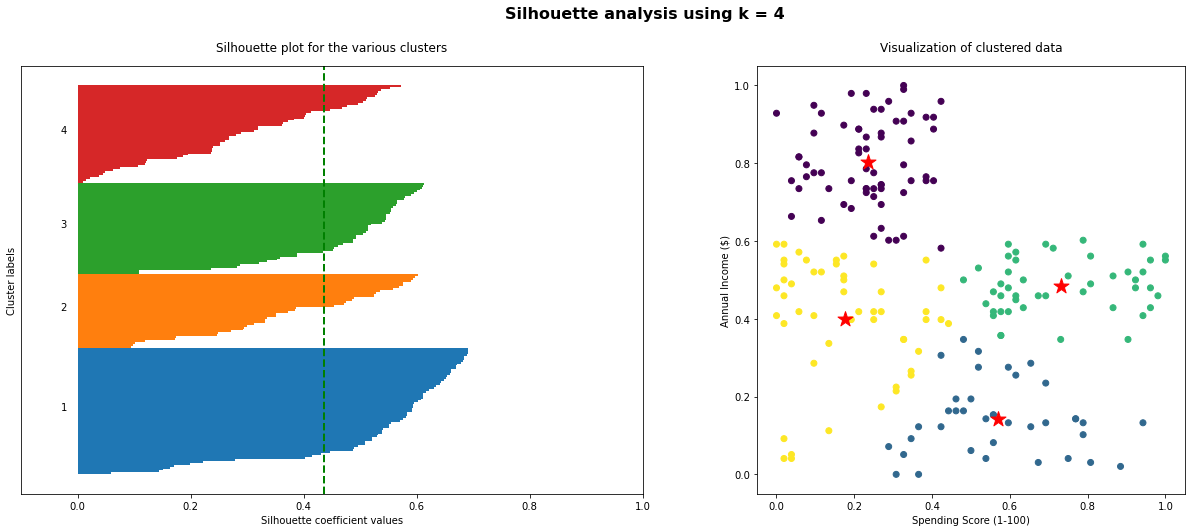

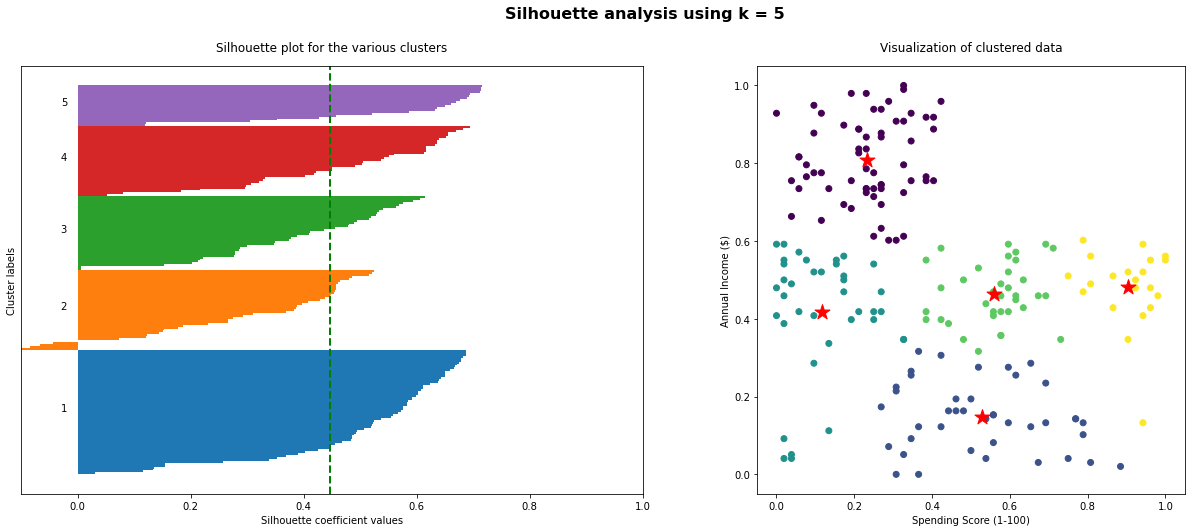

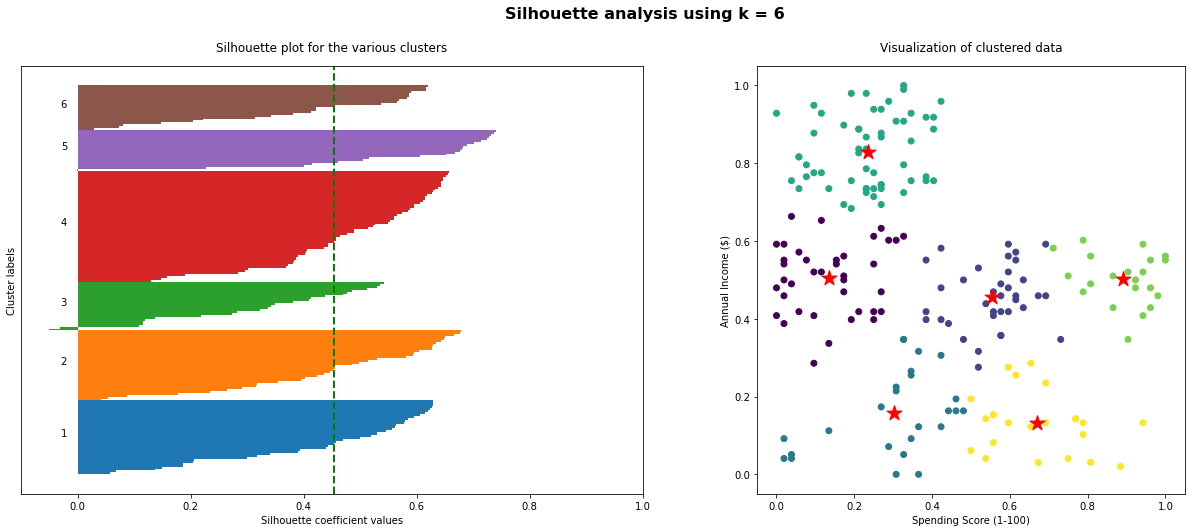

In [39]:

X_std = df_norm

lista_k = [3,4,5,6]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
        # Scatter plot of data colored with labels
    ax2.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlabel('Spending Score (1-100)')
    ax2.set_ylabel('Annual Income ($)')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);


The silhouttes shows an optimal conformation for 6 clusters

#### K-Means

C:\Users\axels\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\axels\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


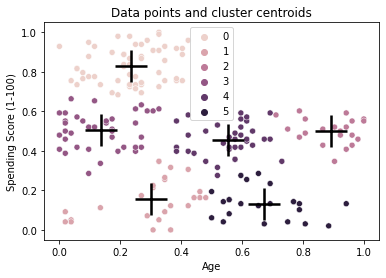

In [40]:
# Train the model
km = KMeans(n_clusters=6)
km = km.fit(df_norm)
# Centers and labels positions
labels = km.labels_
centers = km.cluster_centers_
# Plotting the cluster centers and the data points on a 2D plane
sns.scatterplot(df_norm.iloc[:, 0], df_norm.iloc[:, -1], hue = labels)
sns.scatterplot(centers[:, 0], centers[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

In [41]:

df_analisis = df_norm.copy()
df_analisis.head()
df_analisis.rename(columns={'Age': 'age_norm'}, inplace=True)


In [42]:
df_analisis.head()

,age_norm,Spending Score (1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


In [43]:
df_analisis['Age'] = df_cluster['Age']

In [44]:
for k in range(km.n_clusters):
    print("Cluster {:d} (Age: {:2f} ,Spending Score: {:2f} ".format(k, km.cluster_centers_[k,0], km.cluster_centers_[k,1]))

Cluster 0 (Age: 0.234143 ,Spending Score: 0.830111 
Cluster 1 (Age: 0.301538 ,Spending Score: 0.157143 
Cluster 2 (Age: 0.891941 ,Spending Score: 0.502430 
Cluster 3 (Age: 0.136134 ,Spending Score: 0.504834 
Cluster 4 (Age: 0.555021 ,Spending Score: 0.455215 
Cluster 5 (Age: 0.670569 ,Spending Score: 0.132209 


In [46]:
clustersDf = pd.DataFrame(labels)
clustersDf.columns = ['cluster_predicted']
df_kmeans_clusters = pd.concat([df_analisis, clustersDf], axis = 1).reset_index()
df_kmeans_clusters.head()

,index,age_norm,Spending Score (1-100),Age,cluster_predicted
0,0,0.019231,0.387755,19,3
1,1,0.057692,0.816327,21,0
2,2,0.038462,0.051020,20,1
3,3,0.096154,0.775510,23,0
4,4,0.250000,0.397959,31,3


Text(0, 0.5, 'Customers')

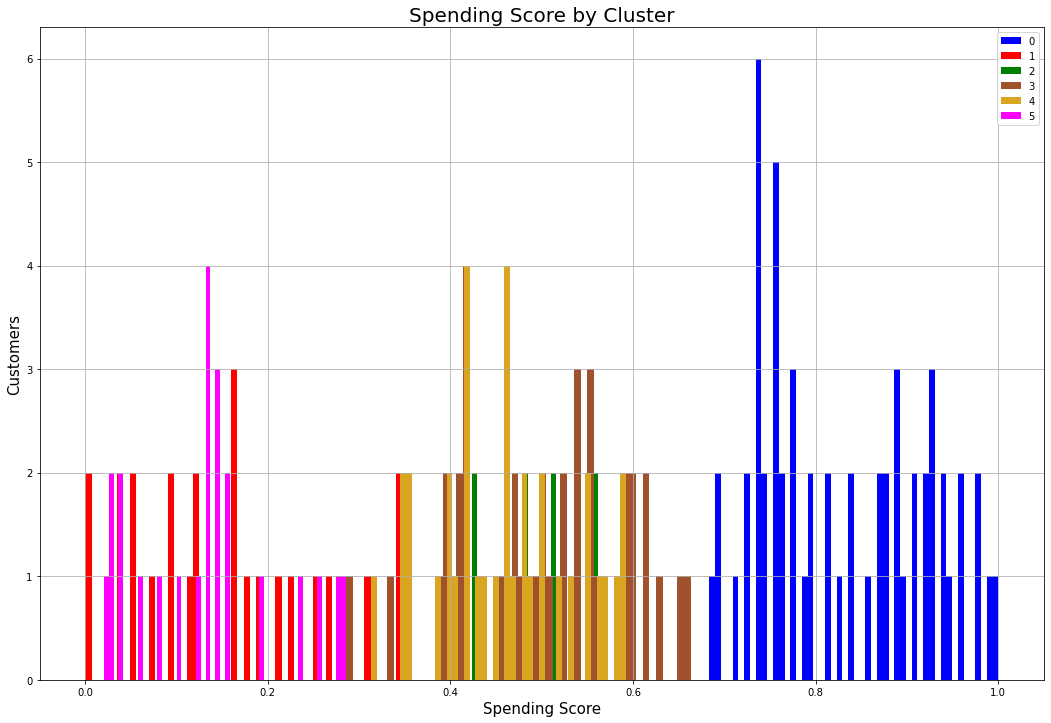

In [47]:
plt.figure(figsize=(18,12))
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==0]["Spending Score (1-100)"].hist(bins=50,color="b",label ='0') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==1]["Spending Score (1-100)"].hist(bins=50,color="r",label ='1') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==2]["Spending Score (1-100)"].hist(bins=50,color="g",label ='2') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==3]["Spending Score (1-100)"].hist(bins=50,color="sienna",label ='3') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==4]["Spending Score (1-100)"].hist(bins=50,color="goldenrod",label ='4') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==5]["Spending Score (1-100)"].hist(bins=50,color="magenta",label ='5') 
plt.legend()
ax.set_title('Spending Score by Cluster',fontsize=20)
ax.set_xlabel('Spending Score',fontsize=15)
ax.set_ylabel('Customers',fontsize=15)

Text(0, 0.5, 'Customers')

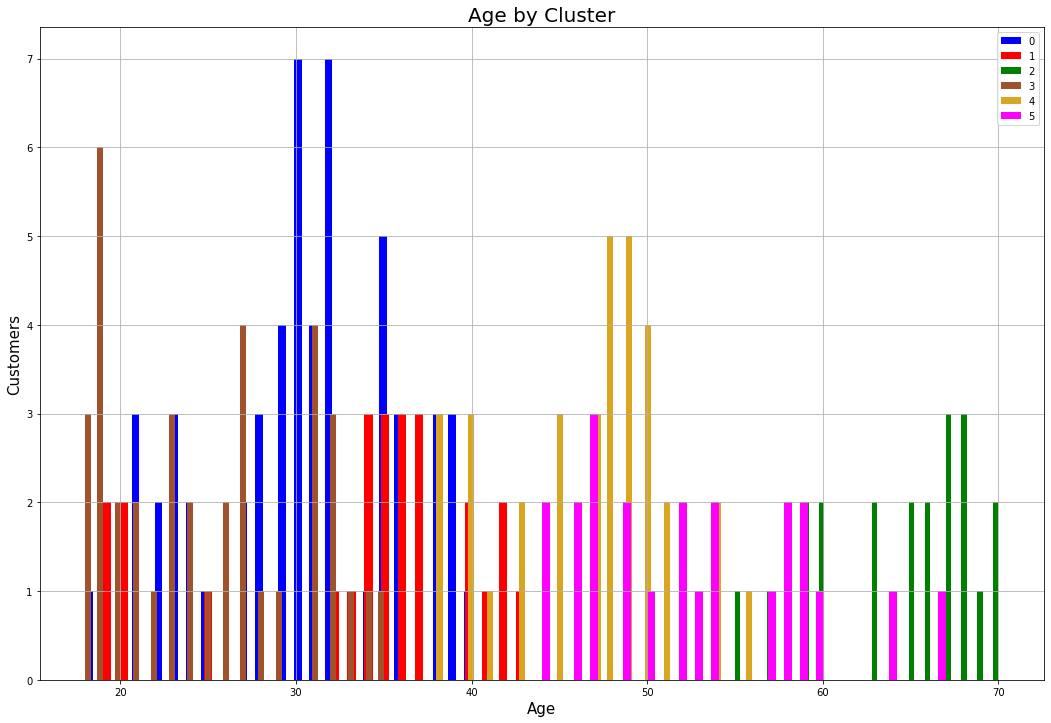

In [48]:
plt.figure(figsize=(18,12))
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==0]["Age"].hist(bins=50,color="b",label ='0') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==1]["Age"].hist(bins=50,color="r",label ='1') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==2]["Age"].hist(bins=50,color="g",label ='2') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==3]["Age"].hist(bins=50,color="sienna",label ='3') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==4]["Age"].hist(bins=50,color="goldenrod",label ='4') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==5]["Age"].hist(bins=50,color="magenta",label ='5') 
plt.legend()
ax.set_title('Age by Cluster',fontsize=20)
ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Customers',fontsize=15)

In [49]:
# Grouping ages to facilitate the analysis
def edades(x):
    if x<25:
        x = '18-24'
    elif x<30:
        x = '25-29'
    elif x<36:
        x = '30-35'
    elif x<41:
        x = '36-40'
    elif x<50:
        x = '40-49'
    elif x<61:
        x = '50-60'
    elif x<71:
        x = '60-70'
    else:
        x = '+70'
    return x


df_analisis['Age'] = df_analisis['Age'].apply(edades)

In [50]:
df_analisis['cluster_predicted'] = df_kmeans_clusters["cluster_predicted"]
df_analisis['Age'].value_counts()



30-35    43
18-24    35
40-49    33
50-60    28
36-40    24
25-29    20
60-70    17
Name: Age, dtype: int64

In [51]:
df_analisis = df_analisis.sort_values(['cluster_predicted','Age'])
df_analisis.head()

,age_norm,Spending Score (1-100),Age,cluster_predicted
1,0.057692,0.816327,18-24,0
3,0.096154,0.775510,18-24,0
5,0.076923,0.765306,18-24,0
7,0.096154,0.948980,18-24,0
13,0.115385,0.775510,18-24,0


In [53]:
import plotly.express as px


df_analisis["cluster_predicted"] = df_analisis["cluster_predicted"].astype(str)
fig = px.bar(df_analisis, x="Age",color="cluster_predicted", title="Age by cluster", color_discrete_sequence=["#0080ff", "#ff3333", "#00ff00", "#990099","#ff9933","#00ffff"])
fig.show()



In [54]:
df_analisis['Spending Score'] = df_cluster['Spending Score (1-100)']
df_analisis.head()

,age_norm,Spending Score (1-100),Age,cluster_predicted,Spending Score
1,0.057692,0.816327,18-24,0,81
3,0.096154,0.775510,18-24,0,77
5,0.076923,0.765306,18-24,0,76
7,0.096154,0.948980,18-24,0,94
13,0.115385,0.775510,18-24,0,77


In [55]:
#Grouping spending scores to facilitate the analysis
def scores(x):
    if x<11:
        x = '1-10'
    elif x<21:
        x = '11-20'
    elif x<31:
        x = '21-30'
    elif x<41:
        x = '31-40'
    elif x<51:
        x = '41-50'
    elif x<61:
        x = '51-60'
    elif x<71:
        x = '61-70'
    elif x<81:
        x = '71-80'
    elif x<91:
        x = '81-90'
    else:
        x= '91-100'
    return x


df_analisis['Spending Score'] = df_analisis['Spending Score'].apply(scores)

In [56]:
df_analisis = df_analisis.sort_values(['Spending Score','cluster_predicted'])
df_analisis.head()

,age_norm,Spending Score (1-100),Age,cluster_predicted,Spending Score
2,0.038462,0.051020,18-24,1,1-10
134,0.038462,0.040816,18-24,1,1-10
138,0.019231,0.091837,18-24,1,1-10
162,0.019231,0.040816,18-24,1,1-10
6,0.326923,0.051020,30-35,1,1-10


In [57]:
import plotly.express as px


df_analisis["cluster_predicted"] = df_analisis["cluster_predicted"].astype(str)
fig = px.bar(df_analisis, x="Spending Score",color="cluster_predicted", title="Spending score by cluster",color_discrete_sequence=["#ff3333","#ff9933", "#00ff00","#990099","#00ffff","#0080ff"])
fig.show()

fig.write_html("scores_cluster.html")

In [58]:
df_analisis.head()
cluster0 = df_analisis[df_analisis['cluster_predicted']=="0"]
cluster1 = df_analisis[df_analisis['cluster_predicted']=="1"]
cluster2 = df_analisis[df_analisis['cluster_predicted']=="2"]
cluster3 = df_analisis[df_analisis['cluster_predicted']=="3"]
cluster4 = df_analisis[df_analisis['cluster_predicted']=="4"]
cluster5 = df_analisis[df_analisis['cluster_predicted']=="5"]

In [59]:
cluster0.head()

,age_norm,Spending Score (1-100),Age,cluster_predicted,Spending Score
177,0.173077,0.693878,25-29,0,61-70
187,0.192308,0.683673,25-29,0,61-70
191,0.269231,0.693878,30-35,0,61-70
3,0.096154,0.775510,18-24,0,71-80
5,0.076923,0.765306,18-24,0,71-80


------------------Cluster 0-----------
30-35    0.438596
18-24    0.210526
36-40    0.175439
25-29    0.175439
Name: Age, dtype: float64
71-80     0.421053
81-90     0.280702
91-100    0.245614
61-70     0.052632
Name: Spending Score, dtype: float64
------------------Cluster 1-----------
36-40    0.32
30-35    0.32
40-49    0.16
18-24    0.16
25-29    0.04
Name: Age, dtype: float64
1-10     0.36
11-20    0.32
21-30    0.16
31-40    0.16
Name: Spending Score, dtype: float64
------------------Cluster 2-----------
60-70    0.714286
50-60    0.285714
Name: Age, dtype: float64
51-60    0.523810
41-50    0.428571
31-40    0.047619
Name: Spending Score, dtype: float64
------------------Cluster 3-----------
18-24    0.500000
30-35    0.263158
25-29    0.236842
Name: Age, dtype: float64
51-60    0.394737
41-50    0.342105
61-70    0.131579
31-40    0.105263
21-30    0.026316
Name: Spending Score, dtype: float64
------------------Cluster 4-----------
40-49    0.555556
50-60    0.277778
36-40    

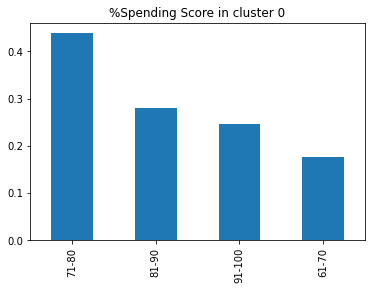

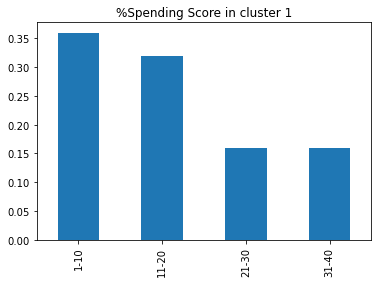

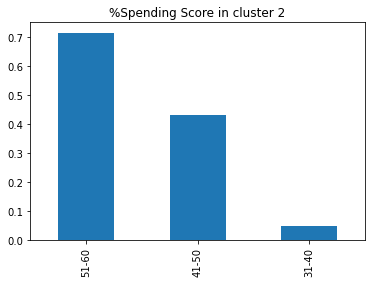

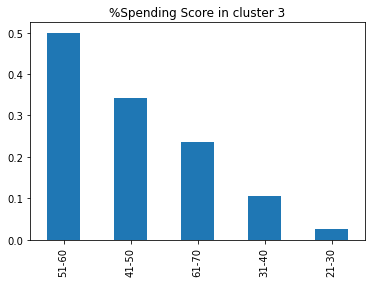

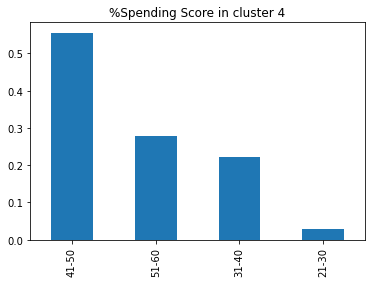

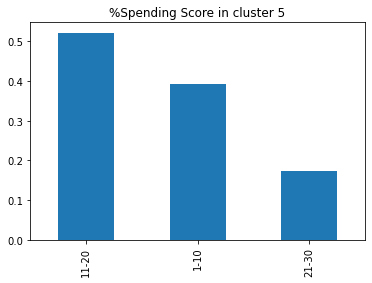

In [60]:
clusters = [cluster0,cluster1,cluster2,cluster3,cluster4,cluster5]
j=0
for i in clusters:
    print(f'------------------Cluster {j}-----------')
    print(i['Age'].value_counts(normalize=True))
    print(i['Spending Score'].value_counts(normalize=True))
    plt.figure(j)
    i['Age'].value_counts(normalize=True).plot.bar(title=f'%Age in cluster {j}')
    i['Spending Score'].value_counts(normalize=True).plot.bar(title=f'%Spending Score in cluster {j}')
    j+=1
    

In [61]:
df_analisis["cluster_predicted"] = df_analisis["cluster_predicted"].astype(str)
fig = px.scatter(df_analisis, x="age_norm", y="Spending Score (1-100)", color="cluster_predicted", symbol="cluster_predicted",color_discrete_sequence=["#990099","#0080ff","#ff3333", "#ff9933","#00ff00","#00ffff"])
fig.show()

-